In [32]:
#imports
import pandas as pd
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,confusion_matrix,roc_curve,auc
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Function 1

In [33]:
#Takes test data as input and results Test labels as ouput
def function1(X_test):
    #loads best model
    # Load the Model back from file
    with open('final_model.pkl', 'rb') as file:  
        clf = pickle.load(file)
    
    #predict labels
    pred_label = clf.predict(X_test)
    
    #predicted value of y probabilities
    pred_proba = clf.predict_proba(X_test)
    
    return [pred_label,pred_proba]

# Function 2

In [34]:
#takes true label and predicted label and shows all necessary performance plots and metrics
def function2(y_true,y_pred,pred_proba):
    #Confusion Matrix
    cf_matrix_test = confusion_matrix(y_true,y_pred)

    #taking the probabilit scores instead of the predicted label
    #predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
    fpr_test,tpr_test,threshold_test = roc_curve(y_true,pred_proba[:,1])
    test_auc = round(auc(fpr_test,tpr_test),3)
    
    #ROC_AUC plot and score
    print('ROC_AUC curve plot :\n\n')
    plt.figure(figsize=(10,8))
    plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
    plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    plt.title('ROC curve')
    plt.legend()
    plt.show()
    print('\n\t*********Best AUC for the model is {}  **********'.format(test_auc))
    
    #plot confusion matrix
    print('\n\nConfusion Matrix : \n\n')
    plt.figure(figsize=(10,8))
    sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
    plt.show()
    
    #f1 score
    print('\n\nTest F1_score for this model is : ----->',round(f1_score(y_true,y_pred),4))
    
    #accuracy score
    print('\n\nTest Accuracy score for this model : ----->',round(accuracy_score(y_true,y_pred),4))

ROC_AUC curve plot :




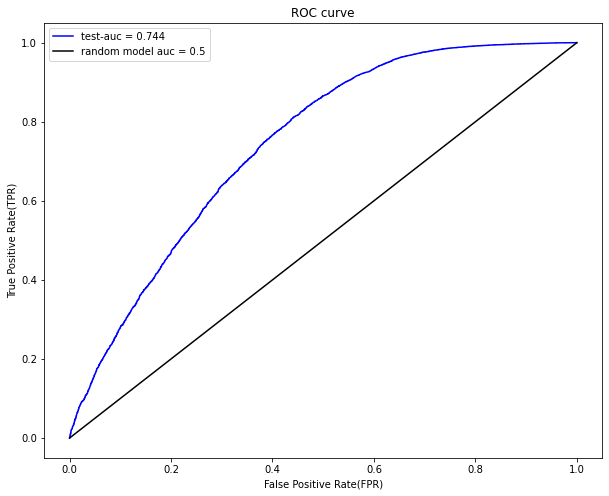


	*********Best AUC for the model is 0.744  **********


Confusion Matrix : 




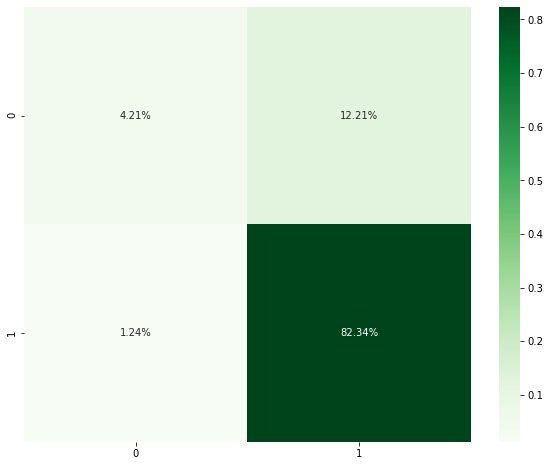



Test F1_score for this model is : -----> 0.9245


Test Accuracy score for this model : -----> 0.8655


In [35]:
# Function Call
#Function 1 to get the predicted values
X_test = sp.sparse.load_npz('X_test_vec.npz')
pred_label,pred_proba = function1(X_test)

#Function 2 to get the performance metrics and plots
y_test = pd.read_csv('test_labels.csv').values.ravel()
function2(y_test,pred_label,pred_proba)